In [22]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
%matplotlib inline

In [40]:
f = TFile("mctrk_recovtx_cosbnb_mult_nue_ana.root","READ")

s_evts = f.tree.GetEntries()
length = [ ]

nue_len = []
nue_pid = []
nue_e = []
nue_mult = []
nue_vtx = []
nue_vtx_a = []

ccpi0_len = []
ccpi0_pid = []
ccpi0_e = []
ccpi0_mult = []
tot_energy = []
ccpi0_vtx = []
ccpi0_vtx_a = []

for i in xrange(s_evts):
    
    getEvt = f.tree.GetEntry(i)
    #print "stuff", f.tree.nue_event, f.tree.ccpi0_event
    #break
    if f.tree.nue_event == True:
        nue_mult.append(f.tree.track_mult)
        nue_e.append(f.tree.nu_energy)
        nue_vtx_a.append(f.tree.vtx_diff)

        if f.tree.track_mult == 1:
            nue_len.append(f.tree.length)
            nue_pid.append(f.tree.pid)
            nue_vtx.append(f.tree.vtx_diff)
            #nue_e.append(f.tree.nu_energy) 
    if f.tree.ccpi0_event == True:
        #print "IN HERE"
        ccpi0_mult.append(f.tree.track_mult)
        ccpi0_e.append(f.tree.nu_energy)
        ccpi0_vtx_a.append(f.tree.vtx_diff)

        if f.tree.track_mult == 1:
            ccpi0_len.append(f.tree.length)
            ccpi0_pid.append(f.tree.pid)
            ccpi0_vtx.append(f.tree.vtx_diff)


Total CCpi0:  1680.0
Total nue:  87.0
13.0  nue's and  39.0  ccpi0's


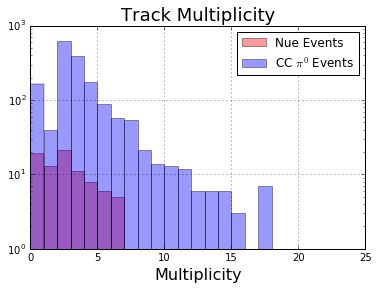

In [41]:
nue_s, bins_s,_=plt.hist(nue_mult,bins=25,facecolor='red',alpha=0.4,range=[0,25],label="Nue Events")
ccpi0_s,_,_=plt.hist(ccpi0_mult,bins=25,facecolor='blue',alpha=0.4,range=[0,25],label="CC $\\pi^0$ Events")
plt.xlabel("Multiplicity",fontsize=16)
plt.legend()
plt.title("Track Multiplicity",fontsize=18)
plt.grid(True)

nue_tot = np.cumsum(nue_s)[-1]        
#print nue_s
print "Total CCpi0: ", np.cumsum(ccpi0_s)[-1]
print "Total nue: ", nue_tot

print nue_s[1], " nue's and ", ccpi0_s[1], " ccpi0's"
eff = [ 1 - float(np.cumsum(nue_s[i+1:])[-1])/nue_tot for i in xrange(len(nue_s)-1) ] 
#print nue_s[1:]
bins_ss = [i+0.5 for i in bins_s] 
#print len(eff), len(bins_ss)
    
#ax2 = plt.twinx()
#plt.plot(bins_ss[:-2],eff,'ko',label="Efficiency")       
#ax2.set_ylabel('Efficiency of Nue Removal', color='k')
#ax2.set_ylim(0,1)        

plt.savefig('NueMultCompare.png')
plt.yscale('log')
plt.savefig('NueMultCompareLog.png')

TOTAL NUE:  0.0
TOTAL CCPi0:  0.0


/Library/Python/2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars


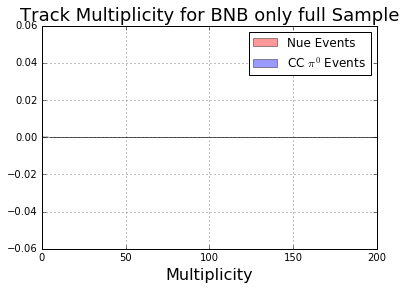

In [42]:
nue_s,_,_=plt.hist(nue_vtx,bins=50,facecolor='red',alpha=0.4,range=[0,200],label="Nue Events")
ccpi0_s,_,_=plt.hist(ccpi0_vtx,bins=50,facecolor='blue',alpha=0.4,range=[0,200],label="CC $\\pi^0$ Events")
plt.xlabel("Multiplicity",fontsize=16)
plt.legend()
plt.title("Track Multiplicity for BNB only full Sample",fontsize=18)
plt.grid(True)

nue_tot = np.cumsum(nue_s)[-1]        
print "TOTAL NUE: ",nue_tot
print "TOTAL CCPi0: ",np.cumsum(ccpi0_s)[-1]


eff = [ 1 - float(np.cumsum(nue_s[i+1:])[-1])/nue_tot for i in xrange(len(nue_s)-1) ] 
#print nue_s[1:]
bins_ss = [i+0.5 for i in bins_s] 
#print len(eff), len(bins_ss)
    
#ax2 = plt.twinx()
#plt.plot(bins_ss[:-2],eff,'ko',label="Efficiency")       
#ax2.set_ylabel('Efficiency of Nue Removal', color='k')
#ax2.set_ylim(0,1)        

plt.savefig('NueVtxCompare.png')
#plt.yscale('log')
#plt.savefig('NueVtxCompareLog.png')

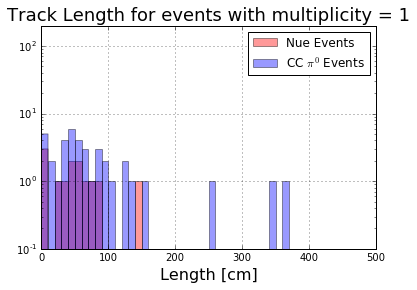

In [43]:
_,_,_=plt.hist(nue_len,bins=50,facecolor='red',alpha=0.4,range=[0,500],label="Nue Events")
_,_,_=plt.hist(ccpi0_len,bins=50,facecolor='blue',alpha=0.4,range=[0,500],label="CC $\\pi^0$ Events")
plt.xlabel("Length [cm]",fontsize=16)
plt.legend()
plt.title("Track Length for events with multiplicity = 1",fontsize=18)
plt.grid(True)

#print nue_len, ccpi0_len

#nue_tot = len(nue_mult)        
#eff = [ float(np.cumsum(nue_s[i:])[-1])/nue_tot for i in xrange(len(nue_s)) ] 
#bins_ss = [i+0.5 for i in bins_s]       
#ax2 = plt.twinx()
#plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
#ax2.set_ylabel('Efficiency of Nue Removal', color='k')
#ax2.set_ylim(0,1)        
#plt.show()
plt.yscale('log')
plt.ylim(0.1,200)
plt.savefig('NueLenCompare.png')

#plt.ylim(0.1,400)
#plt.xlim(0,400)
#plt.savefig('NueLenCompareLog.png')

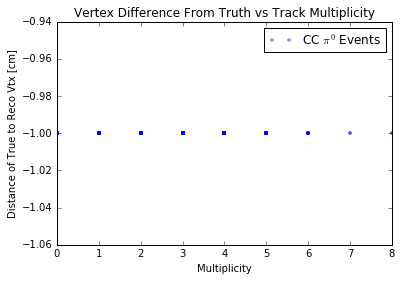

In [36]:
plt.plot(ccpi0_mult,ccpi0_vtx_a,'b.',alpha=0.4,label="CC $\\pi^0$ Events")
#plt.plot(nue_mult,nue_vtx_a,'r.',alpha=0.4,label="Nue Events")
plt.xlabel("Multiplicity")
plt.ylabel("Distance of True to Reco Vtx [cm]")
plt.legend()
plt.title("Vertex Difference From Truth vs Track Multiplicity")
plt.xlim(0,8)
plt.savefig("MultvsVtx.png")

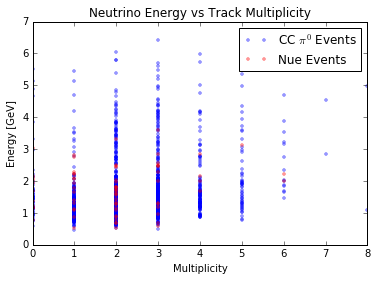

In [37]:
plt.plot(ccpi0_mult,ccpi0_e,'b.',alpha=0.4,label="CC $\\pi^0$ Events")
plt.plot(nue_mult,nue_e,'r.',alpha=0.4,label="Nue Events")
plt.xlabel("Multiplicity")
plt.ylabel("Energy [GeV]")
plt.legend()
plt.title("Neutrino Energy vs Track Multiplicity")
plt.xlim(0,8)
plt.savefig("MultvsE.png")